<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/series_homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
base = "/Users/fvb/Projects/jupyter/series/1/Series/"
files = [
    "mean-monthly-air-temperature-deg.csv",
]

In [ ]:
def show_graph_autocorr(y, title, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    # return y
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()

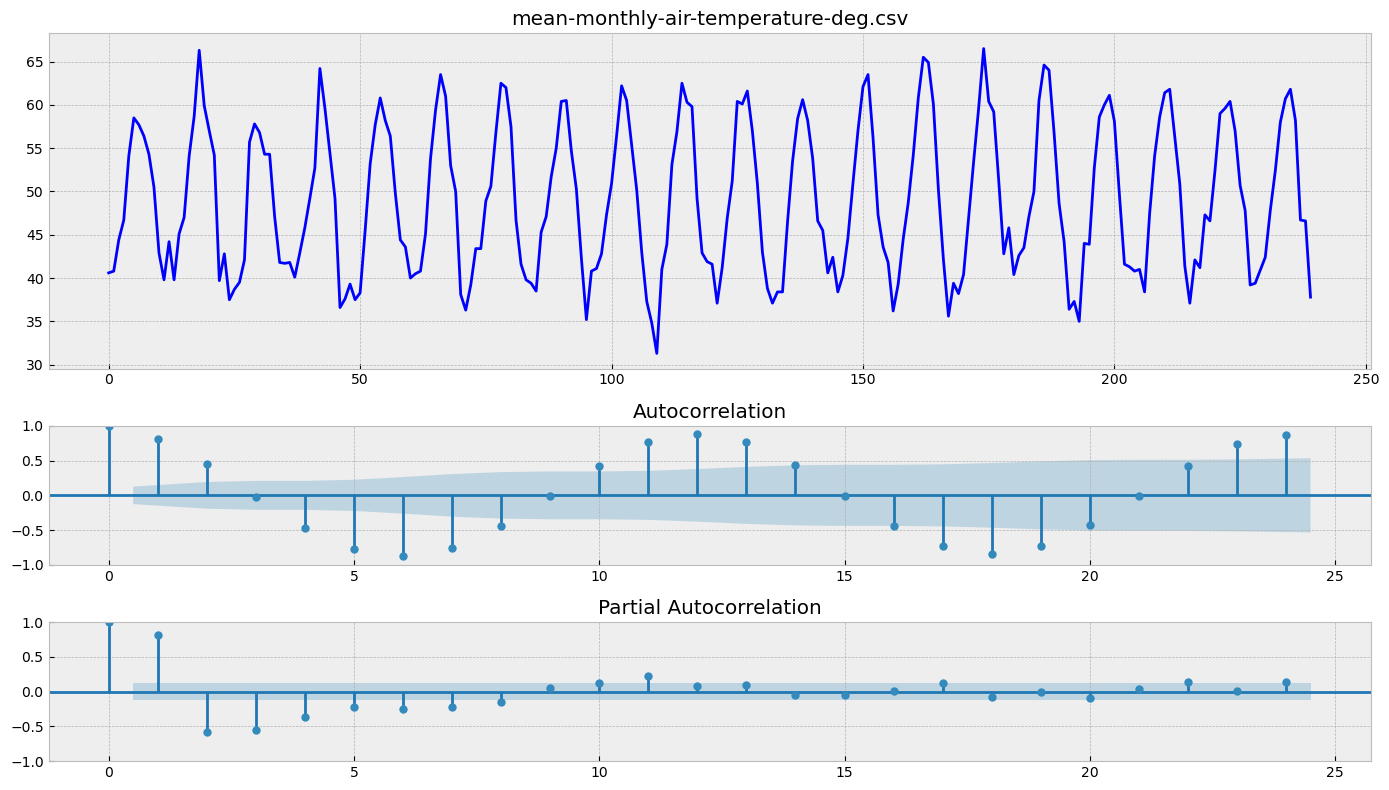

In [ ]:
series = pd.read_csv(base + files[0]).iloc[:,1]

show_graph_autocorr(series, files[0])

In [ ]:
max_lag = 3
mdl = sm.tsa.arima.ARIMA(series, order=(2, 2, 0))
mfit = mdl.fit() # maxlag=max_lag, method='mle', trend='nc', burin=burn
#print(mfit.summary())
mfit.aic

1453.8415069656526

In [ ]:
import warnings
warnings.filterwarnings('ignore')

best_aic = np.inf
best_order = None
best_mdl = None

for i in range(10):
    for j in range(10):
        try:
            mdl = sm.tsa.arima.ARIMA(series, order=(i, 0, j))
            mfit = mdl.fit()
            aic = mfit.aic
            #print('aic: {:6.5f} | order: {}'.format(mfit.aic, (i, j)))
            if mfit.aic < best_aic:
                best_aic = mfit.aic
                best_order = (i, j)
                best_mdl = mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 1113.38497 | order: (6, 7)
